# Data Exploration

This notebook examines the dataset and visualizes some relationships in the data.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import lib.theme as theme

plt.rcParams["font.family"] = "Noto sans"

In [2]:
df_matches = pd.read_pickle("data/matches_train.pickle")

## Host advantage

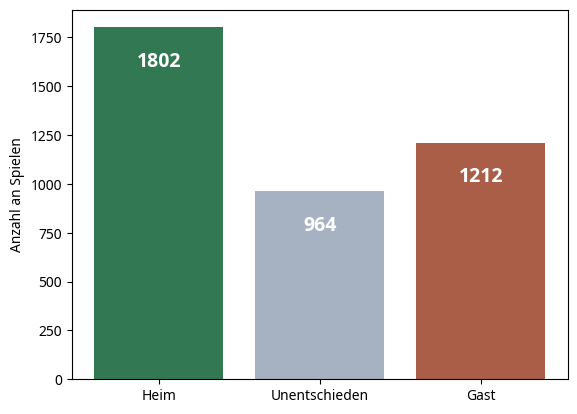

In [3]:
diffs = (df_matches["host_goals"] - df_matches["guest_goals"]).values
host_wins = np.count_nonzero(diffs > 0)
guest_wins = np.count_nonzero(diffs < 0)
draws = np.count_nonzero(diffs == 0)
fig, ax = plt.subplots()
rects = ax.bar(["Heim", "Unentschieden", "Gast"], [host_wins, draws, guest_wins], color=[theme.MATCH_RESULT["host_wins"], theme.MATCH_RESULT["draw"], theme.MATCH_RESULT["guest_wins"]])
ax.bar_label(rects, [host_wins, draws, guest_wins], padding=-32, color="white", weight="bold", size=14)
ax.set_ylabel("Anzahl an Spielen")
!

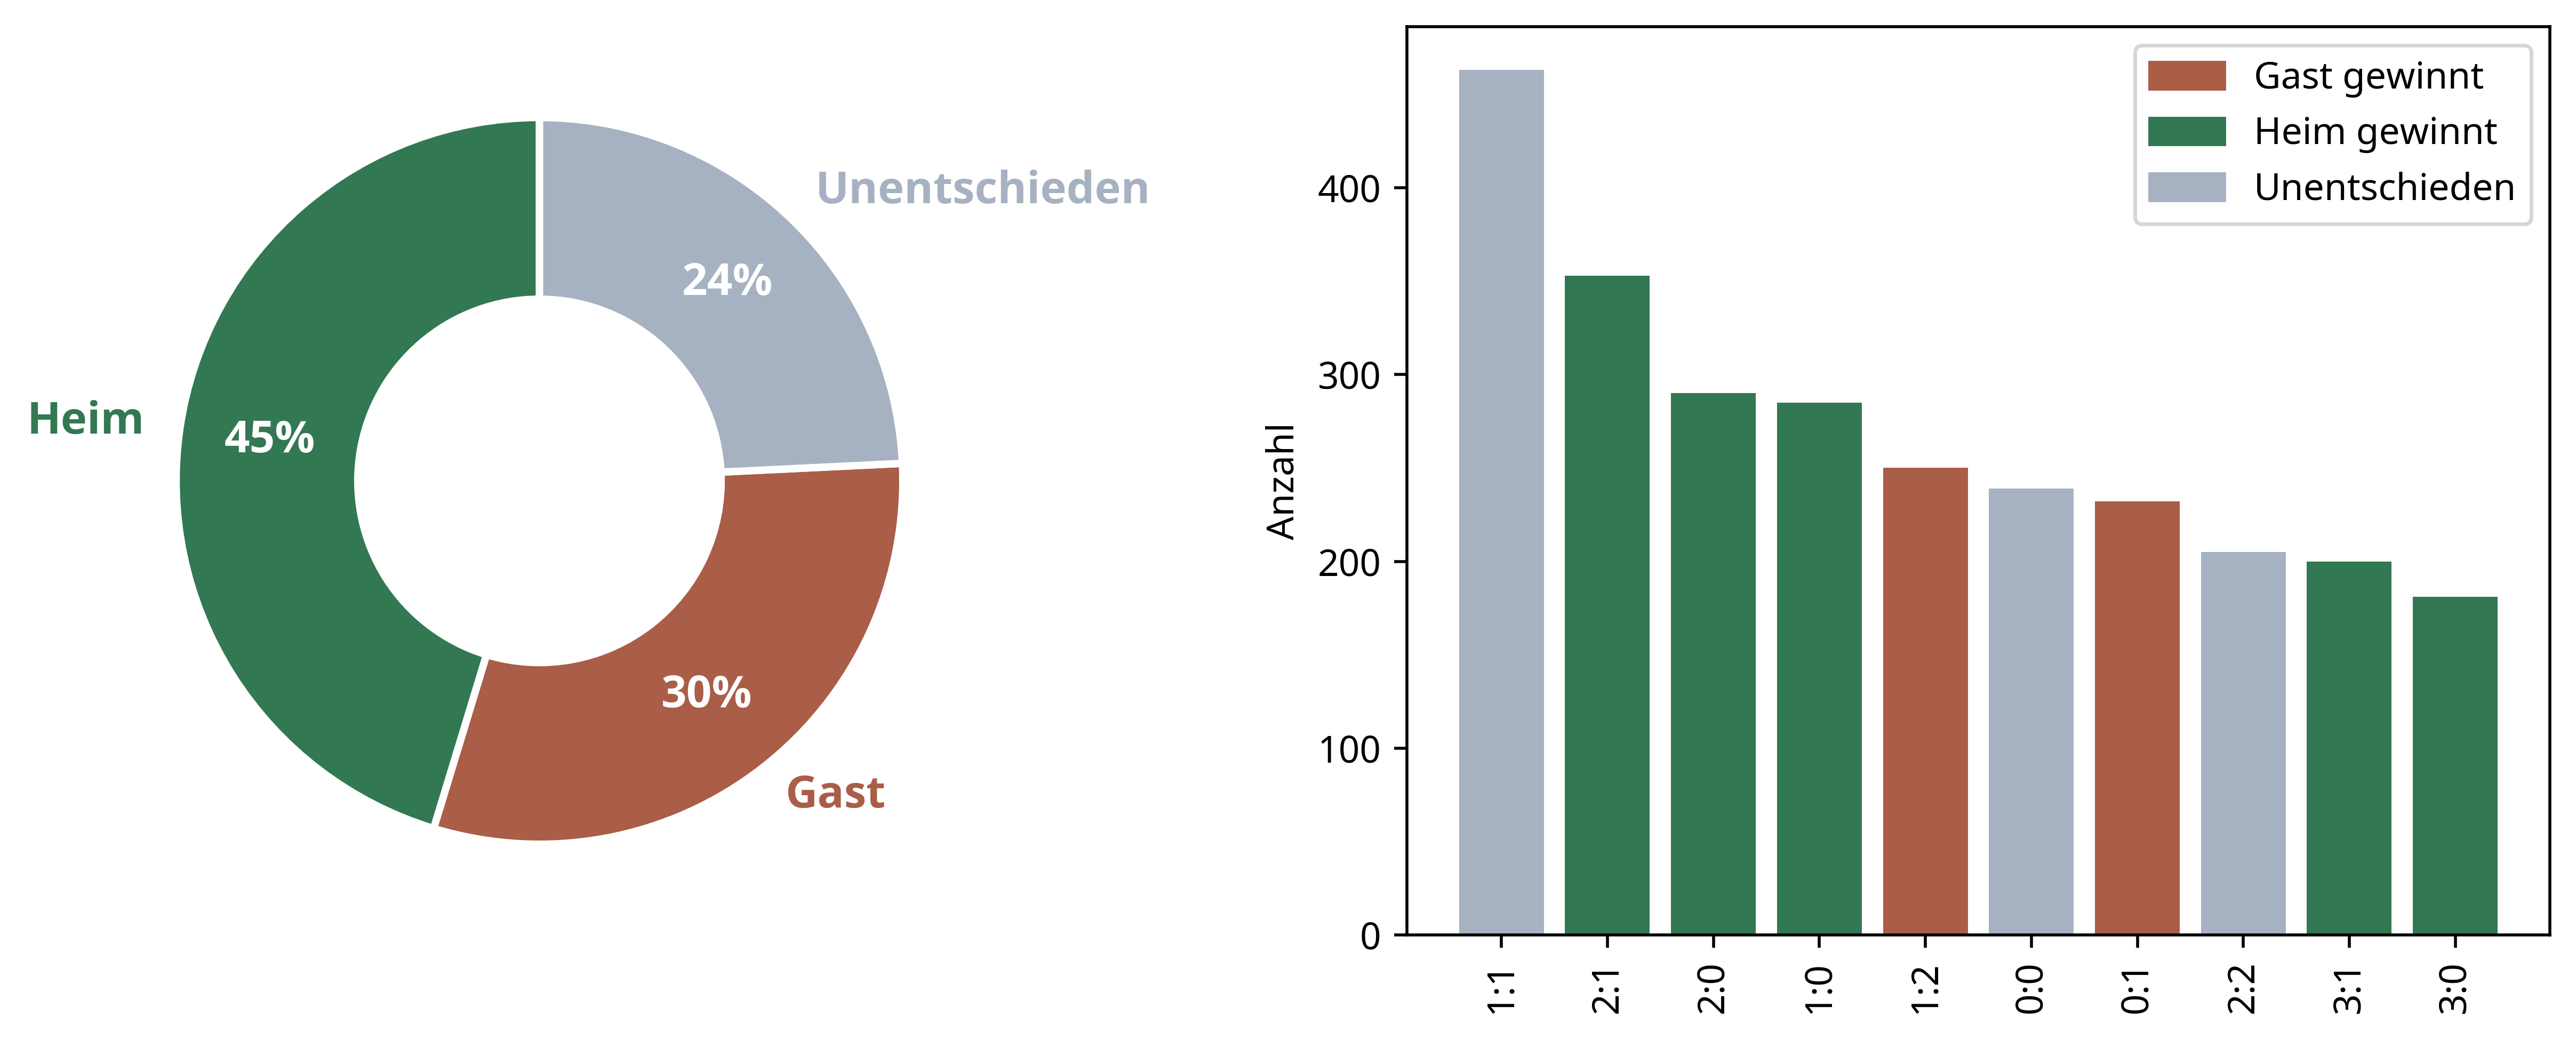

In [4]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4), dpi=500)
ax = axs[0]
labels = 'Heim', 'Gast', 'Unentschieden'
sizes = [host_wins, guest_wins, draws]
color = [theme.MATCH_RESULT["host_wins"], theme.MATCH_RESULT["guest_wins"], theme.MATCH_RESULT["draw"]]

_, labels, value_labels = ax.pie(sizes, labels=labels, autopct='%1.1d%%', startangle=90, pctdistance=0.75, colors=color, textprops={'fontsize': 12}, wedgeprops={'linewidth': 2, 'edgecolor': 'white', 'width': 0.5})
for l in value_labels:
    l.set_color("white")
    l.set_fontweight("bold")

for l, c in zip(labels, color):
    l.set_color(c)
    l.set_fontweight("bold")


ax = axs[1]
goals_encoded = [
    f"{int(r[0])}:{int(r[1])}" for r in df_matches[["host_goals", "guest_goals"]].values
]
results, counts = np.unique(goals_encoded, return_counts=True)
sort = np.argsort(-counts)
counts = counts[sort]
results = results[sort]

top_k = 10
counts = counts[:top_k]
results = results[:top_k]

tendency = [1] * len(results)
for i, res in enumerate(results):
    goals = res.split(":")
    if goals[0] > goals[1]:
        tendency[i] = 0
    elif goals[0] < goals[1]:
        tendency[i] = 2

y_test_colors = [
    [
        theme.MATCH_RESULT["host_wins"],
        theme.MATCH_RESULT["draw"],
        theme.MATCH_RESULT["guest_wins"],
    ][r]
    for r in tendency
]
ax.bar(range(len(results)), counts, color=y_test_colors)
ax.set_ylabel(f"Anzahl")
ax.set_xticks(range(len(results)), results, rotation=90)

red_patch = mpatches.Patch(color=theme.MATCH_RESULT["guest_wins"], label="Gast gewinnt")
green_patch = mpatches.Patch(color=theme.MATCH_RESULT["host_wins"], label="Heim gewinnt")
gray_patch = mpatches.Patch(color=theme.MATCH_RESULT["draw"], label="Unentschieden")
ax.legend(handles=[red_patch, green_patch, gray_patch])
fig.tight_layout()

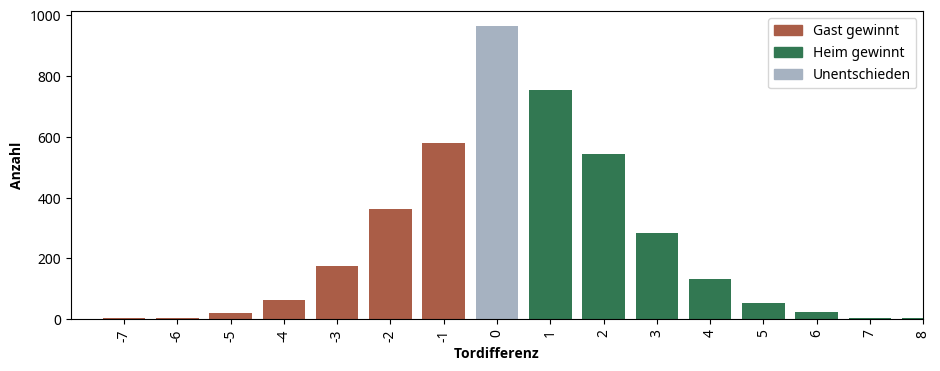

In [5]:
diff_counts = (df_matches["host_goals"] - df_matches["guest_goals"]).value_counts()
diff_colors = []
for diff in diff_counts.index:
    if diff == 0:
        diff_colors.append(theme.MATCH_RESULT["draw"])
    elif diff > 0:
        diff_colors.append(theme.MATCH_RESULT["host_wins"])
    elif diff < 0:
        diff_colors.append(theme.MATCH_RESULT["guest_wins"])


plt.figure(figsize=(11, 4))
plt.bar(diff_counts.index, diff_counts.values, color=diff_colors)
plt.xticks(rotation=90, ticks=diff_counts.index)
plt.ylabel("Anzahl", weight="bold")
plt.xlabel("Tordifferenz", weight="bold")
plt.xlim(-8, 8)
red_patch = mpatches.Patch(color=theme.MATCH_RESULT["guest_wins"], label='Gast gewinnt')
green_patch = mpatches.Patch(color=theme.MATCH_RESULT["host_wins"], label='Heim gewinnt')
gray_patch = mpatches.Patch(color=theme.MATCH_RESULT["draw"], label='Unentschieden')
plt.legend(handles=[red_patch, green_patch, gray_patch])
!

## Matches per team

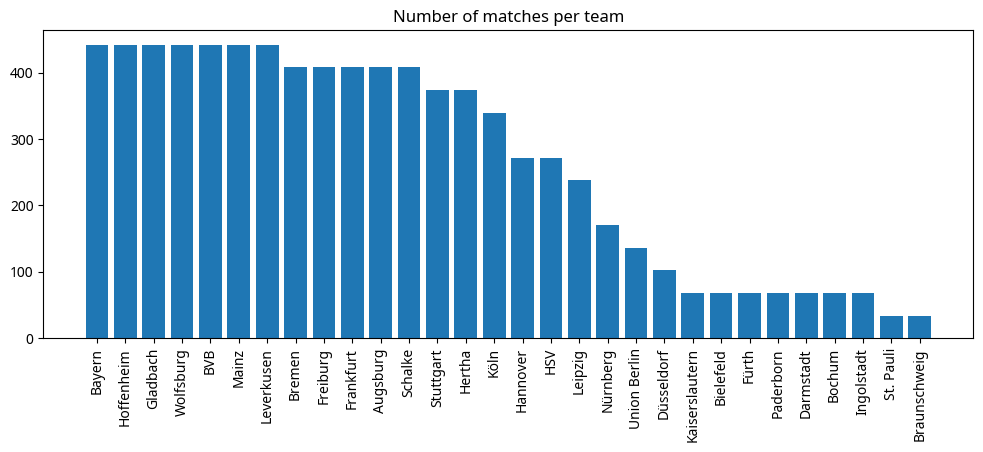

In [6]:
matches_per_team = {}
for name, n_matches in df_matches["host_name"].value_counts().to_dict().items():
    matches_per_team[name] = n_matches

for name, n_matches in df_matches["guest_name"].value_counts().to_dict().items():
    if name not in matches_per_team:
        matches_per_team[name] = 0
    matches_per_team[name] += n_matches

fig, ax = plt.subplots(figsize=(12, 4))
ax.set_title("Number of matches per team")
ax.bar(matches_per_team.keys(), matches_per_team.values())
ax.set_xticks(range(len(matches_per_team.keys())), matches_per_team.keys(), rotation=90, ha='center')
!